In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics.cluster import completeness_score

#### Get the Data 

In [2]:
df = pd.read_csv('College.csv', sep = ',', index_col = 0)

In [3]:
df.head

<bound method NDFrame.head of                                Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

### Statical View of Data

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### Data Preprocessing

In [6]:
df['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [7]:
le = LabelEncoder()
df['Private'] = le.fit_transform(df['Private'])
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
df.drop('Private',axis=1)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [9]:
cols = df.columns

In [10]:
mn = MinMaxScaler()
df = mn.fit_transform(df)

In [11]:
df

array([[1.        , 0.03288693, 0.04417701, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [1.        , 0.04384229, 0.07053089, ..., 0.25      , 0.13838671,
        0.42592593],
       [1.        , 0.0280549 , 0.03903572, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [1.        , 0.04198863, 0.07018813, ..., 0.3125    , 0.09683865,
        0.36111111],
       [1.        , 0.22127341, 0.09067713, ..., 0.765625  , 0.70126492,
        0.82407407],
       [1.        , 0.06056693, 0.06790312, ..., 0.4375    , 0.02494015,
        0.82407407]])

In [12]:
df = pd.DataFrame(df,columns=[cols])

In [13]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,1.0,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,1.0,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,1.0,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,1.0,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


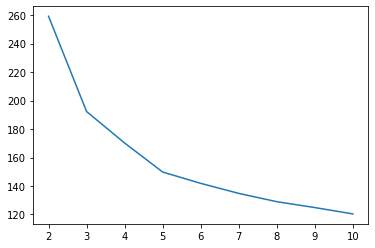

In [14]:
sse = []
for i in range(2,11):
    km = KMeans(n_clusters= i, max_iter = 50)
    km.fit_predict(df)
    sse.append(km.inertia_)
plt.plot(range(2,11),sse)

In [15]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 2, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 2, 0, 0, 3, 4, 3,
       0, 1, 4, 3, 4, 1, 0, 4, 0, 4, 0, 0, 4, 0, 2, 2, 4, 4, 4, 4, 0, 0,
       4, 3, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 3, 0, 0, 2, 2, 1, 0, 4, 2, 0,
       0, 0, 4, 1, 2, 2, 2, 4, 4, 0, 4, 4, 1, 3, 4, 0, 0, 4, 4, 0, 2, 2,
       4, 0, 4, 2, 3, 0, 4, 0, 4, 0, 0, 4, 0, 4, 3, 3, 3, 0, 2, 4, 4, 4,
       4, 0, 3, 0, 2, 4, 0, 4, 1, 3, 4, 4, 2, 2, 4, 3, 0, 4, 0, 4, 4, 4,
       4, 4, 0, 0, 4, 2, 1, 4, 2, 1, 0, 4, 2, 0, 0, 0, 0, 2, 4, 4, 4, 0,
       0, 0, 0, 0, 2, 2, 0, 3, 4, 4, 4, 3, 0, 0, 0, 0, 0, 4, 2, 4, 2, 4,
       3, 3, 0, 0, 3, 3, 0, 0, 4, 4, 4, 4, 0, 0, 4, 2, 3, 4, 4, 3, 4, 3,
       0, 0, 4, 1, 0, 1, 0, 4, 3, 3, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 3, 4,
       0, 2, 1, 3, 0, 2, 0, 4, 4, 0, 4, 0, 0, 3, 0, 0, 0, 2, 4, 4, 4, 0,
       2, 4, 4, 0, 4, 0, 4, 4, 2, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 4, 4, 4, 3, 4, 0, 0, 3, 1, 0, 0, 1, 4, 1, 0, 3, 0, 4, 2, 3,
       0, 4, 1, 0, 3, 0, 2, 4, 4, 0, 4, 0, 4, 2, 0,

In [16]:
df['Clusters'] = y_pred
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Clusters
0,1.0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,0
1,1.0,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,0
2,1.0,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,0
3,1.0,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,2
4,1.0,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,0


In [19]:
print(confusion_matrix(df['Clusters'],km.labels_))
print(classification_report(df['Clusters'],km.labels_))

[[237   0   0   0   0]
 [  0  65   0   0   0]
 [  0   0  76   0   0]
 [  0   0   0 148   0]
 [  0   0   0   0 251]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00       148
           4       1.00      1.00      1.00       251

    accuracy                           1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777

